# Analysis for Thymus DNA-FISH

Data from: \\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA

by Pu Zheng

2020.04.30

In [45]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

21120


# 1. Create field-of-view class

In [3]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA',
             'save_folder':r'D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA',
             'experiment_type': 'DNA',
             'num_threads': 13,
             #'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210514-Corrections_2color_50_new_fiber',
             'correction_folder':r'D:\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':False,
                     'min_num_seeds':250,
                     'max_num_seeds': 2000,
                     'spot_seeding_th': 600,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 }, 
             'ref_id': 0, # special for this experiment
             }

In [4]:
# process fov in batch
#fov_ids = np.concatenate([np.arange(2,8), np.arange(83,89), [63,64,66,67,68,70]])
fov_ids = [5]

for _fov_id in fov_ids:
    # create fov class
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              )
    # 2. Process image into candidate spots
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=False, 
                                _overwrite_drift=False, _overwrite_image=False,
                                _overwrite_spot=False,
                                _verbose=True)

    # 4. load dapi image
    dapi_im = fov._load_dapi_image(_dapi_id=0)
    
    # 5. Process Protein images
    fov.parallel = False
    fov.protein_ref_id = 0
    fov._process_image_to_spots('protein', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=True,
                                _fit_spots=False,
                                _overwrite_drift=False, _overwrite_image=False,
                                _overwrite_spot=False,
                                _verbose=True)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 26
- Number of field of views: 73
- Importing csv format color_usage file: \\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25P1'])
- 26 folders are found according to color-usage annotation.
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
++ load illumination correction profile fro

-- loading image from file:\\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA\H25P1\Conv_zscan_05.dax  in 5.031s
-- removing hot pixels for channels:['750', '647', '488'] in 10.031s
-- illumination correction for channels: 750, 647, 488, in 3.390s
-- apply bead_drift calculate for channel: 488
-- start aligning given source image to given reference image.
--- align image 0 in 4.891s.
--- align image 1 in 5.338s.
--- align image 2 in 5.427s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.04  0.45 25.1 ] in 15.719s
-- warp image with chromatic correction for channels: ['750'] and drift:[-0.04  0.45 25.1 ] 750, 647, in 151.999s
-- finish correction in 186.733s
- writting protein info to file:D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_05.hdf5
-- updated ims for id:[1, 2], drifts for id:[1, 2] in 2.594s
-- update drift of H25P1\Conv_zscan_05.dax into file:\\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA\Analysis\drift\Conv

In [5]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['protein']
    protein_ims = _grp['ims'][:]
    protein_ids = _grp['ids'][:]

<IPython.core.display.Javascript object>


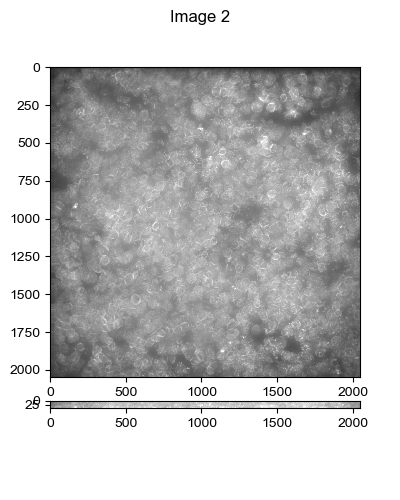

In [6]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2(list(protein_ims)+[fov.dapi_im])

In [7]:
from scipy import ndimage, stats
from skimage import morphology

In [8]:

snr_th = 1.5
_im = protein_ims[0]
_binary_im = _im >= io_tools.load.find_image_background(_im) * snr_th


In [10]:
# dilation and erosion
morphology_size = 2
_bim = ndimage.binary_dilation(_binary_im, morphology.ball(morphology_size))
_bim = ndimage.binary_erosion(_bim, morphology.ball(morphology_size))
_bim = ndimage.binary_fill_holes(_bim, structure=morphology.ball(morphology_size))

In [11]:
## 4. find object
_min_label_size = 150
_label = morphology.remove_small_objects(_bim, _min_label_size).astype(np.uint16)
_open_objects = morphology.opening(_label, morphology.ball(1))
_close_objects = morphology.closing(_open_objects, morphology.ball(2))
_label, _num = ndimage.label(_close_objects)
_label[_label==0] = -1

In [12]:
segment_label = _label.copy()

<IPython.core.display.Javascript object>


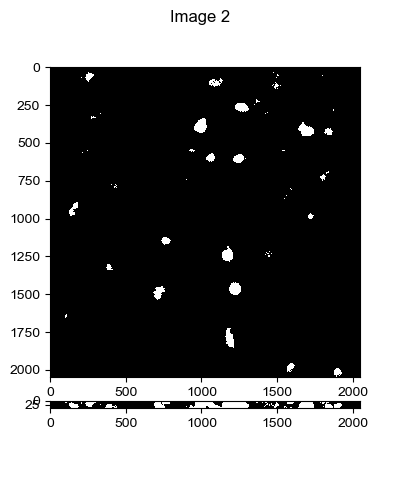

In [13]:
visual_tools.imshow_mark_3d_v2([_im, _binary_im, _label])

In [21]:
intensity_th = 500
vis_combo_inds = [0,1,2,3,4]
vis_combo_ims, vis_combo_ids, vis_combo_spot_list, vis_combo_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    
    for _ind in vis_combo_inds:
        vis_combo_ims.append(_grp['ims'][_ind])
        vis_combo_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_combo_raw_spot_list.append(_grp['raw_spots'][_ind][_grp['raw_spots'][_ind][:,0] > intensity_th])

E:\Users\puzheng\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


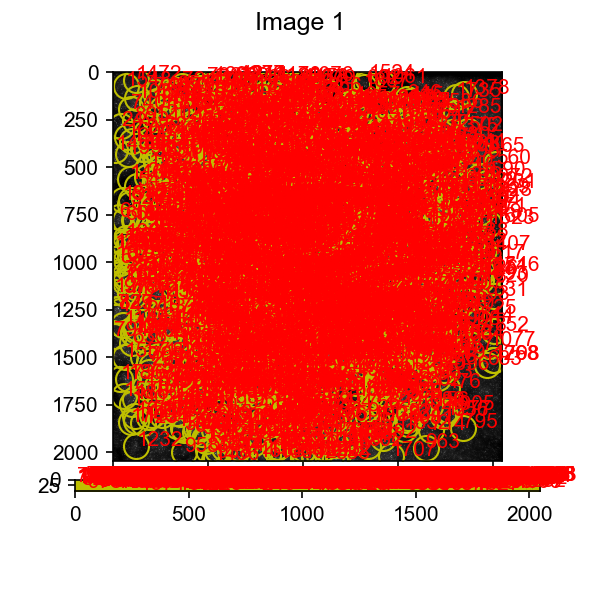

In [97]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_combo_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 200]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(list(vis_combo_ims)+[_im], 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

In [14]:
def generate_crops_from_segmentation(segmentation_label, extend_dim=10):
    
    _crops = []

    for _l in range(int(np.max(segmentation_label))):
        #
        _binary_label = segmentation_label == _l + 1
        #
        _crop = []
        for _idim, _dim in enumerate(np.shape(segmentation_label)):
            _has_label = np.where(np.max(_binary_label, 
                                  axis=tuple([_i for _i in np.arange(len(np.shape(segmentation_label))) 
                                              if _i != _idim]))
                                 )[0]
            _llim, _rlim = np.min(_has_label), np.max(_has_label)+1
            _llim = max(0, _llim - extend_dim)
            _rlim = min(_dim, _rlim + extend_dim)
            _crop.append([_llim, _rlim])
        
        _crops.append(np.array(_crop, dtype=np.int32))
            
    return _crops
    

In [41]:
seg_crops = generate_crops_from_segmentation(segment_label, extend_dim=50)

In [42]:
def crop_warp_image(im:np.ndarray, 
                    crop_list:list, 
                    drift=None, 
                    chromatic_source=None, 
                    ):
    """Function to crop and warp images"""
    
    from scipy.ndimage.interpolation import map_coordinates
    for _icrop, crop in enumerate(crop_list):
        if _icrop != sel_crop:
            continue
        # generate coordinates
        _crop = np.array(crop, dtype=np.int32)
        _crop_sizes = _crop[:,1] - _crop[:,0]
        _pixel_coords = np.indices(_crop_sizes).reshape(len(_crop_sizes), -1) + _crop[:,0][:, np.newaxis]
        
        # add drift
        if drift is not None:
            _pixel_coords = _pixel_coords - drift[:len(_crop_sizes),np.newaxis]
        # add chromatic
        if chromatic_source is not None:
            # generate chromatic translation function
            _chromatic_func = correction_tools.chromatic.generate_chromatic_function(chromatic_source)
            # 
            _pixel_coords = _pixel_coords - (_chromatic_func(_pixel_coords.transpose()).transpose() - _pixel_coords)
            print(_crop)
            print(_pixel_coords)
        _cim = map_coordinates(im, _pixel_coords,
                       mode='nearest', cval=np.min(im))
        _cim = _cim.reshape(_crop_sizes)
            
            
            
        break
       
    return _cim

In [28]:
cim = crop_warp_image(combo_ims[0], seg_crops, chromatic_source=fov.correction_profiles['chromatic_constants']['750'])



[[   0   50]
 [ 566  648]
 [1199 1294]]
[[-8.05722909e-01 -8.05449261e-01 -8.05175613e-01 ...  4.88100986e+01
   4.88103722e+01  4.88106459e+01]
 [ 5.66845077e+02  5.66845056e+02  5.66845034e+02 ...  6.47642015e+02
   6.47641993e+02  6.47641971e+02]
 [ 1.19850028e+03  1.19949846e+03  1.20049664e+03 ...  1.29040445e+03
   1.29140262e+03  1.29240080e+03]]


In [17]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    combo_ims = _grp['ims'][:]
    combo_ids = _grp['ids'][:]
    combo_channels = _grp['channels'][:]
    combo_drifts = _grp['drifts'][:]

In [19]:
sel_crop = 1

In [43]:
cropped_ims = []
for _i, (_im, _ch, _dft) in enumerate(zip(combo_ims, combo_channels, combo_drifts)):
    print(_i)
    cim = crop_warp_image(_im, seg_crops, drift=_dft,
                          chromatic_source=fov.correction_profiles['chromatic_constants'][_ch.decode()])
    cropped_ims.append(cim)

0
[[   0   50]
 [ 526  688]
 [1159 1334]]
[[-8.25154312e-01 -8.24880664e-01 -8.24607016e-01 ...  4.88295300e+01
   4.88298036e+01  4.88300773e+01]
 [ 5.26918793e+02  5.26918771e+02  5.26918749e+02 ...  6.87568299e+02
   6.87568278e+02  6.87568256e+02]
 [ 1.15857316e+03  1.15957134e+03  1.16056951e+03 ...  1.33033157e+03
   1.33132975e+03  1.33232792e+03]]
1
2
[[   0   50]
 [ 526  688]
 [1159 1334]]
[[-7.72334045e-01 -7.72060397e-01 -7.71786749e-01 ...  4.88823502e+01
   4.88826239e+01  4.88828975e+01]
 [ 5.17219689e+02  5.17219667e+02  5.17219645e+02 ...  6.77869195e+02
   6.77869173e+02  6.77869151e+02]
 [ 1.16194373e+03  1.16294190e+03  1.16394008e+03 ...  1.33370214e+03
   1.33470031e+03  1.33569849e+03]]
3
4
[[   0   50]
 [ 526  688]
 [1159 1334]]
[[-7.56950740e-01 -7.56677092e-01 -7.56403444e-01 ...  4.88977335e+01
   4.88980072e+01  4.88982808e+01]
 [ 5.15808738e+02  5.15808716e+02  5.15808694e+02 ...  6.76458244e+02
   6.76458222e+02  6.76458200e+02]
 [ 1.16994579e+03  1.1709439

45
46
[[   0   50]
 [ 526  688]
 [1159 1334]]
[[-7.96495674e-01 -7.96222026e-01 -7.95948378e-01 ...  4.88581886e+01
   4.88584623e+01  4.88587359e+01]
 [ 5.09336804e+02  5.09336782e+02  5.09336761e+02 ...  6.69986311e+02
   6.69986289e+02  6.69986267e+02]
 [ 1.19063124e+03  1.19162942e+03  1.19262759e+03 ...  1.36238965e+03
   1.36338783e+03  1.36438600e+03]]
47
48
[[   0   50]
 [ 526  688]
 [1159 1334]]
[[-8.00377067e-01 -8.00103419e-01 -7.99829771e-01 ...  4.88543072e+01
   4.88545809e+01  4.88548545e+01]
 [ 5.24530191e+02  5.24530169e+02  5.24530147e+02 ...  6.85179697e+02
   6.85179675e+02  6.85179653e+02]
 [ 1.14009364e+03  1.14109181e+03  1.14208999e+03 ...  1.31185204e+03
   1.31285022e+03  1.31384840e+03]]
49


In [130]:
cim = crop_warp_image(vis_combo_ims[3], seg_crops, chromatic_source=fov.correction_profiles['chromatic_constants']['750'])

[[   0   50]
 [ 208  307]
 [1415 1502]]
(3, 430650)


In [22]:
aire_cim = protein_ims[0][tuple([slice(_c[0], _c[1]) for _c in seg_crops[sel_crop]])]

<IPython.core.display.Javascript object>


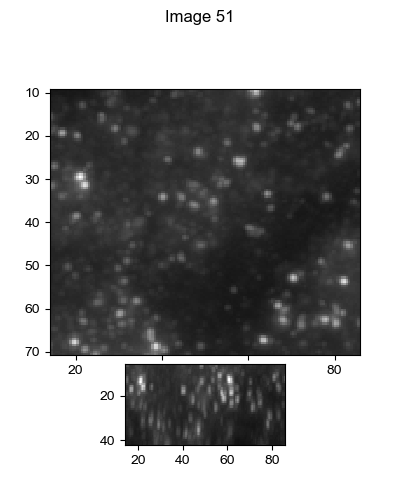

In [44]:
visual_tools.imshow_mark_3d_v2([aire_cim] + cropped_ims)

In [141]:
fov._load_from_file('combo')

+ loading combo from file: D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_03.hdf5
++ finish loading combo in 0.006s. 


In [30]:
bead_im = fov._load_bead_image(_bead_id=1)

- correct the whole fov for image: \\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA\H1C2\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA\H1C2\Conv_zscan_05.dax  in 5.234s
-- removing hot pixels for channels:['488'] in 4.735s
-- illumination correction for channels: 488, in 1.546s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 11.908s


<IPython.core.display.Javascript object>


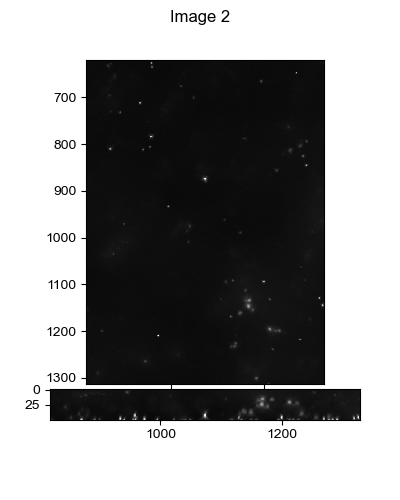

In [31]:
visual_tools.imshow_mark_3d_v2([fov.combo_ref_im, bead_im])

In [37]:
drift_crops = correction_tools.alignment.generate_drift_crops(fov.shared_parameters['single_im_size'])

In [38]:
ref_cim = crop_warp_image(fov.combo_ref_im, drift_crops,)

In [39]:
tar_cim = crop_warp_image(bead_im, drift_crops, drift=combo_drifts[2])

<IPython.core.display.Javascript object>


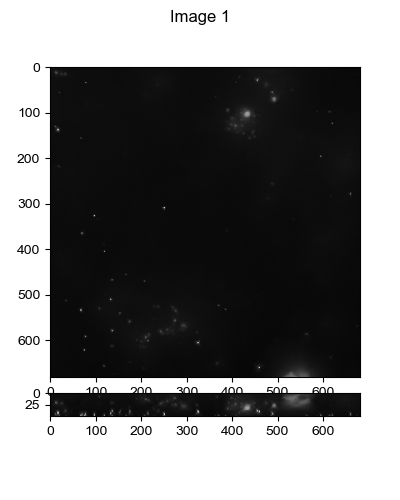

In [40]:
visual_tools.imshow_mark_3d_v2([ref_cim, tar_cim])

In [163]:
combo_drifts

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [ -0.09      ,   8.58      ,   1.45      ],
       [ -0.09      ,   8.58      ,   1.45      ],
       [ -0.11      ,  10.97      ,  -6.3       ],
       [ -0.11      ,  10.97      ,  -6.3       ],
       [ -0.14      ,  12.666667  , -14.19      ],
       [ -0.14      ,  12.666667  , -14.19      ],
       [ -0.10333333,  13.426666  , -15.216666  ],
       [ -0.10333333,  13.426666  , -15.216666  ],
       [ -0.09      ,  13.33      , -11.55      ],
       [ -0.09      ,  13.33      , -11.55      ],
       [ 21.8875    ,   9.5525    ,  -6.0325    ],
       [ 21.8875    ,   9.5525    ,  -6.0325    ],
       [ -0.09666666,  13.38      ,  -7.55      ],
       [ -0.09666666,  13.38      ,  -7.55      ],
       [ -0.12      ,  14.026667  , -19.816668  ],
       [ -0.12      ,  14.026667  , -19.816668  ],
       [ -0.09      ,  14.486667  , -22.036667  ],
       [ -0.09      ,  14.48666